# Regularized Regressions
## Ridge (L2) -> should be the first thing to use 
<b>When to use it?</b> When we create a Linear Regression model and want to make it more accurate on the test dataset.
Therefore, we sacrifice the accuracy of the training set to make it predict better on the test data. Thus, making better
predictions in the long-term.(Also known as bias-variance tradeoff)

- Linear Regression reduces the <b>sum of squared error/residuals</b>, while Ridge reduces the <b>sum of squared residuals + penalty*magnitude</b>
- Can be used in both linear & logistic regressions
- Uses L2 regularization

<b>Formula</b>: $SSR + \lambda * slope^2$, where SSR is <b>sum of squared residuals</b>; $\lambda$ is the <b>magnitude</b> of penalty; <b>slope</b> is the penalty itself

##### Important!
Regularization doesn't require any preprocessing steps <b>except standardization</b>. It works by enriching the
learning process using a penalization for too complex models to shrink (or reduce to zero)
coefficients relative to variables that are irrelevant for your prediction term or are
redundant, as they are highly correlated with others present in the model.


In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline
sns.set()


In [2]:
df = load_boston()
boston = pd.DataFrame(df.data, columns=df.feature_names)
boston['Price'] = df.target

X = boston.iloc[:, :-1]
y = boston.iloc[:, -1]

In [3]:
def results(algorithm, train, train_target, test, test_target, text=''):
    print(text.upper())
    # calculate score
    print(f'In-sample score: {algorithm.score(train, train_target)}')
    print(f'Out-sample score: {algorithm.score(test, test_target)}')

    print('\n==================\n')

    # calculate MSE (mean squared error)
    train_pred = algorithm.predict(train)
    test_pred = algorithm.predict(test)
    print(f'In-Sample MSE: {mean_squared_error(train_target, train_pred)}')
    print(f'Out-sample MSE: {mean_squared_error(test_target, test_pred)}')

    print('\n==================\n')

    # calculate RSS (residual sum squared)
    print(f'In-sample RSS: {np.sum(np.square(train_target - train_pred))}')
    print(f'Out-sample RSS: {np.sum(np.square(test_target - test_pred))}\n')


In [4]:
# unstandardized
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
linear = LinearRegression().fit(X_train, y_train)
results(linear, X_train, y_train, X_test, y_test, text='unstandardized')

UNSTANDARDIZED
In-sample score: 0.7434997532004697
Out-sample score: 0.7112260057484974


In-Sample MSE: 22.545481487421426
Out-sample MSE: 21.5174442311769


In-sample RSS: 7981.100446547185
Out-sample RSS: 3270.651523138889



In [5]:
# standardize & check results
boston_stand = StandardScaler().fit_transform(boston)
Xst = boston_stand[:, :-1]
yst = boston_stand[:, -1]

Xst_train, Xst_test, yst_train, yst_test = train_test_split(Xst, yst, test_size=0.3, random_state=42)
linear_standardized = LinearRegression(normalize=True).fit(Xst_train, yst_train)
results(linear_standardized, Xst_train, yst_train, Xst_test, yst_test, text='standardized')

STANDARDIZED
In-sample score: 0.7434997532004697
Out-sample score: 0.7112260057484932


In-Sample MSE: 0.2670646768826304
Out-sample MSE: 0.2548869623452255


In-sample RSS: 94.54089561645117
Out-sample RSS: 38.742818276474274



In [6]:
# ridge
ridge = Ridge(alpha=1).fit(Xst_train, yst_train)
results(ridge, Xst_train, yst_train, Xst_test, yst_test, text='Ridge standardized')

RIDGE STANDARDIZED
In-sample score: 0.7434821404219876
Out-sample score: 0.7108092176450825


In-Sample MSE: 0.26708301507549
Out-sample MSE: 0.2552548412253695


In-sample RSS: 94.54738733672345
Out-sample RSS: 38.798735866256166



In [7]:
ridge_cv = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), cv=5)
ridge_cv.fit(Xst_train, yst_train)


RidgeCV(alphas=array([ 0.01,  0.1 ,  1.  , 10.  ]), cv=5)

In [8]:
# another example with cross-validation 
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()



In [9]:
gapminder = pd.read_csv('datasets/gapminder.csv')
print(gapminder.shape)
print(gapminder.columns)

(139, 10)
Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'life', 'child_mortality', 'Region'],
      dtype='object')


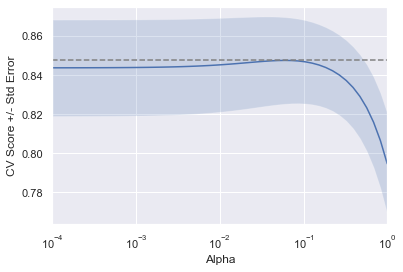

In [10]:
from sklearn.model_selection import cross_val_score

X = gapminder.drop(['life', 'Region'], axis=1)
y = gapminder['life']

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# compute scores over range of alphas
for alpha in alpha_space:
    # specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X, y, cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

## Lasso (L1)
<b>Formula</b>: $OLS + \lambda * \sum_{i=1}^n |a_i|$ <br>

##### Important! 
Can be used to select important features of a dataset. It does so by shrinking the coefficients of less important features to 0. 


ValueError: x and y must have same first dimension, but have shapes (13,) and (8,)

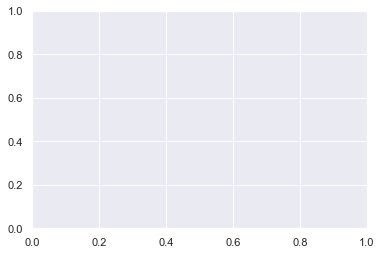

In [11]:
from sklearn.linear_model import Lasso 

names = boston.drop('Price', axis=1).columns
lasso = Lasso(alpha=.1, normalize=True)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')
plt.margins(0.02)
plt.show()

In [ ]:
# important features
features = gapminder.drop(['life', 'Region'], axis=1)
feature_names = features.columns 
target = gapminder['life']

lasso = Lasso(alpha=.4, normalize=True).fit(features, target)
lasso_coef = lasso.coef_

_ = plt.plot(range(len(feature_names)), lasso_coef)
_ = plt.xticks(range(len(feature_names)), feature_names, rotation=60)
plt.margins(0.02)
plt.show()

lasso_coef

## ElasticNet
There is another type of regularized regression known as the elastic net. In elastic net regularization, the penalty term is a linear combination of the L1 and L2 penalties: $$a*L1 + b*L2$$

In [12]:
# Import necessary modules
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

# Create the hyperparameter grid
l1_space = np.linspace(0, 1, 30)
param_grid = {'l1_ratio': l1_space}

# Instantiate the ElasticNet regressor: elastic_net
elastic_net = ElasticNet()

# Setup the GridSearchCV object: gm_cv
gm_cv = GridSearchCV(elastic_net, param_grid, cv=5)

# Fit it to the training data
gm_cv.fit(X_train, y_train)

# Predict on the test set and compute metrics
y_pred = gm_cv.predict(X_test)
r2 = gm_cv.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print("Tuned ElasticNet l1 ratio: {}".format(gm_cv.best_params_))
print("Tuned ElasticNet R squared: {}".format(r2))
print("Tuned ElasticNet MSE: {}".format(mse))


Tuned ElasticNet l1 ratio: {'l1_ratio': 0.20689655172413793}
Tuned ElasticNet R squared: 0.8668305372460283
Tuned ElasticNet MSE: 10.057914133398443
